In [3]:
#  Import Libraries and Load Dataset
# Import required Python libraries such as Pandas, NumPy, Matplotlib, Seaborn, and Plotly Express

import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta, date
import warnings
warnings.filterwarnings('ignore')
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply
import plotly.express as px
import bokeh as bk

In [7]:
# Load the transactions.csv dataset into a Pandas DataFrame

tr = pd.read_csv('transactions.csv')
tr.head()

,Transaction_ID,Product,Category,Quantity,Unit_Price,Date,Store
0,1,Charger,Gadgets,4,956.903512,2022-06-01,Store_A
1,2,Laptop,Electronics,5,303.653831,2022-04-04,Store_B
2,3,Tablet,Gadgets,8,226.925798,2022-08-10,Store_A
3,4,Laptop,Electronics,4,975.494448,2022-04-22,Store_C
4,5,Mobile,Gadgets,8,656.776002,2022-03-05,Store_A


In [11]:
# 2. Analyze Transaction Data
# Calculate revenue for each transaction by multiplying quantity and unit price
tr['Revenue'] = tr['Quantity'] * tr['Unit_Price']


In [17]:
# Extract the month from the Date column
tr['Month'] = tr['Date'].dt.month

In [15]:
# Convert the Date column to datetime format
tr['Date'] = pd.to_datetime(tr['Date'])

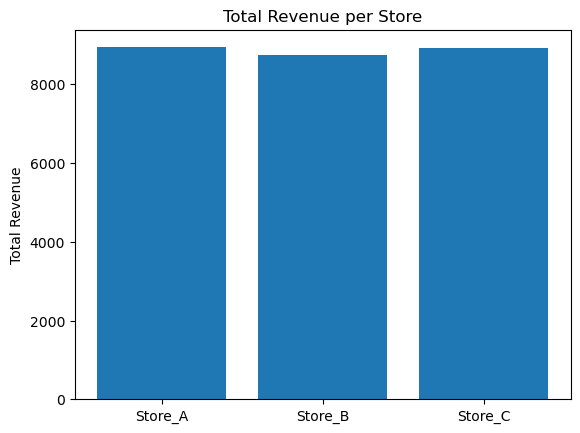

In [44]:
# Plot the distribution of total revenue across different stores using a bar plot
# Add the title as Total Revenue per Store and provide the label for y-axis
plt.bar(x = tr['Store'], height = tr['Revenue'])
plt.title('Total Revenue per Store')
plt.ylabel('Total Revenue')
plt.show()

In [48]:
# 3. Analyze Monthly Revenue Trends
# Group the data by month and calculate the total revenue for each month
monthly_revenue = tr.groupby('Month')['Revenue'].sum()
monthly_revenue

Month
1     365986.810273
2     426452.461588
3     398036.137292
4     464157.221569
5     429056.766214
6     443771.123636
7     413733.554818
8     468731.025016
9     417630.696108
10    425184.599157
11    445097.859105
12    449295.068919
Name: Revenue, dtype: float64

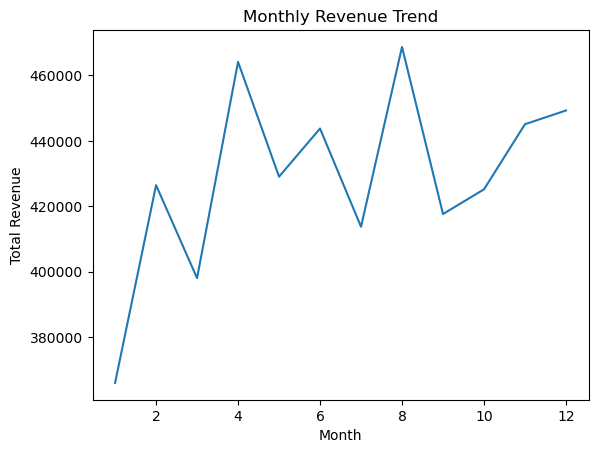

In [62]:
# Plot the monthly revenue trend using a line plot
monthly_revenue.plot(kind='line')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

In [66]:
# 4. Analyze Sales Volume of Products
# Group the data by product and calculate the total quantity sold for each product and identify the top 5 products by sales volume
product_sales = tr.groupby('Product')['Quantity'].sum()
product_sales

top_five_products = product_sales.nlargest(5)
top_five_products

Product
Mobile        2211
Laptop        2129
Charger       2062
Headphones    1924
Tablet        1874
Name: Quantity, dtype: int64

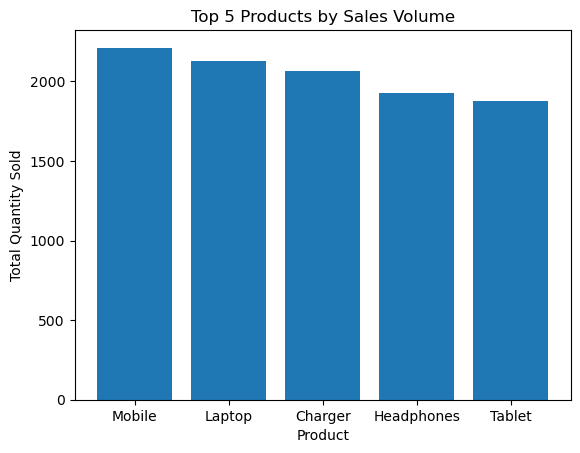

In [74]:
# Plot the top 5 products by sales volume using a bar plot
plt.bar(x = top_five_products.index, height = top_five_products.values)
plt.title('Top 5 Products by Sales Volume')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product')
plt.show()

In [76]:
# 5. Analyze Quantity Sold by Product Category
# Group the data by product category and calculate the total quantity sold for each category
product_category_sales = tr.groupby('Category')['Quantity'].sum()
product_category_sales

Category
Accessories    3505
Electronics    3411
Gadgets        3284
Name: Quantity, dtype: int64

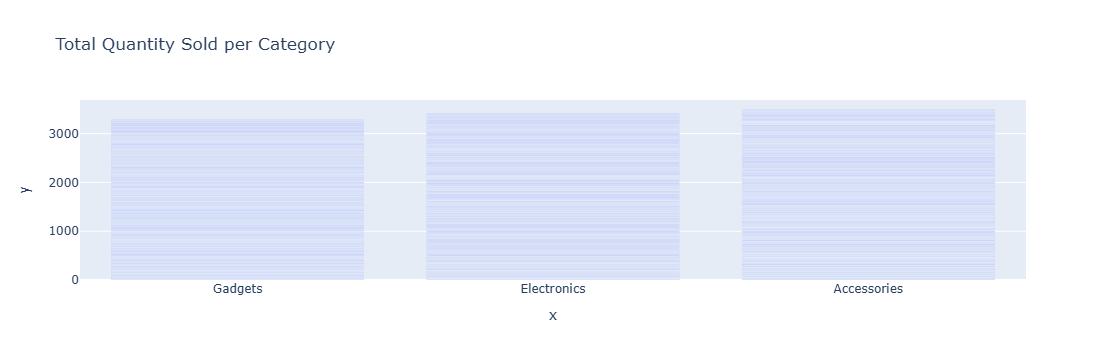

In [93]:
# Plot the total quantity sold per category using Plotly Express
fig = px.bar(product_category_sales, x = tr['Category'], y = tr['Quantity'], title = 'Total Quantity Sold per Category')
fig.show()

In [99]:
# 6. Analyze Store Revenue and Product Data
# Create a pivot table to show monthly revenue for each store
store_monthly_revenue = pd.pivot_table(tr, values = 'Revenue', index = 'Month', columns = 'Store', aggfunc = np.sum)
store_monthly_revenue

Store,Store_A,Store_B,Store_C
Month,,,
1,155844.177361,100283.584550,109859.048362
2,156625.914028,113986.074279,155840.473281
3,80540.518435,150940.806224,166554.812633
4,138393.315190,151849.663380,173914.242999
5,160807.271068,151298.035767,116951.459379
6,160766.094426,105211.656341,177793.372868
7,139729.307324,139308.339530,134695.907964
8,170930.819935,146628.049065,151172.156017
9,138720.309507,138825.608439,140084.778161


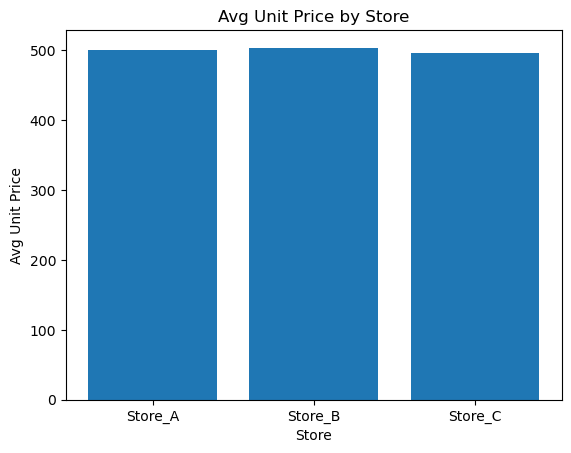

In [109]:
# Plot the average unit price for products at each store using a bar plot
avg_unit_price = tr.groupby('Store')['Unit_Price'].mean()

plt.bar(x = avg_unit_price.index, height = avg_unit_price.values)
plt.title('Avg Unit Price by Store')
plt.ylabel('Avg Unit Price')
plt.xlabel('Store')
plt.show()

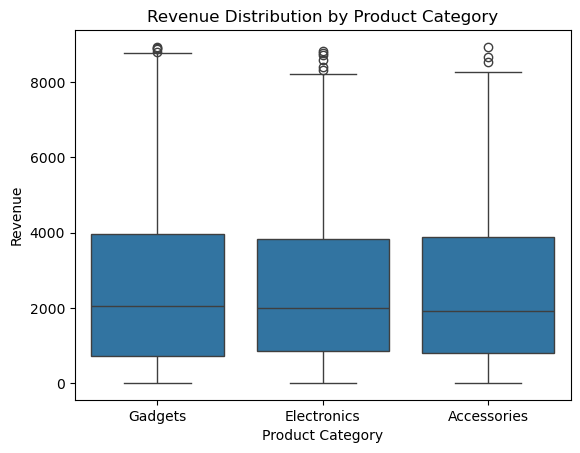

In [115]:
# Plot the revenue distribution for each product category using a box plot
sns.boxplot(x = 'Category', y = 'Revenue', data = tr)
plt.title('Revenue Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.show()

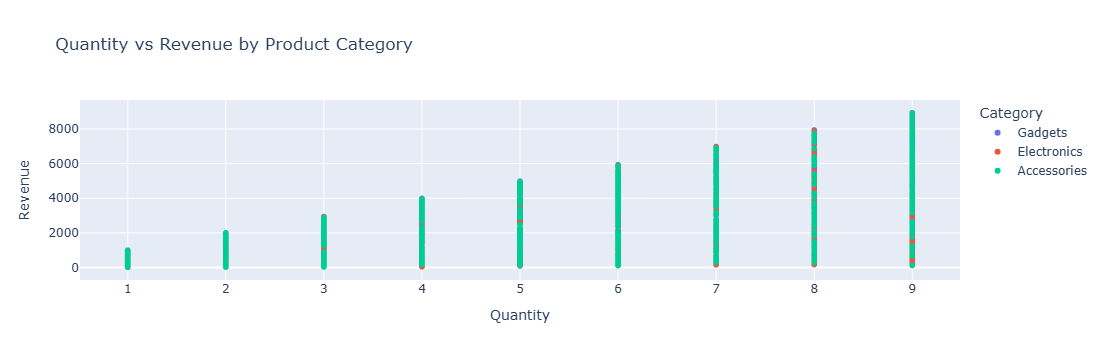

In [127]:
# Plot a scatter plot to show the relationship between quantity and revenue across different product categories using Plotly Express
fig = px.scatter(tr, x = 'Quantity', y = 'Revenue', color = 'Category', title = 'Quantity vs Revenue by Product Category')
fig.show()